## Observations and Insights

## Dependencies and starter code

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from tabulate import tabulate
#%matplotlib notebook

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mice_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

## Summary statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the combined data frame by Drug Regimen
drug_regimen_tumor_volumes = mice_study_data.groupby(['Drug Regimen'])

# Calculate mean of the tumor volumes for each regimen
mean_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].mean()

# Calculate median of the tumor volumes for each regimen
median_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].median()

# Calculate unbiased variance of the tumor volumes for each regimen
var_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].var()

# Calculate standard deviation of the tumor volumes for each regimen
std_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].std()

# Calculate unbiased SEM (standard error of the mean) of the tumor volumes for each regimen
sem_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].sem()

# Save tumor volume statistics to a summary data frame
tumor_volumes_stats_summary = pd.DataFrame( {'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume, 'Variance in Tumor Volume': var_tumor_volume, 'Std Deviation in Tumor Volume': std_tumor_volume, 'SEM for Tumor Volume': sem_tumor_volume} )

# Print tumor volume summary data frame
tumor_volumes_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std Deviation in Tumor Volume,SEM for Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

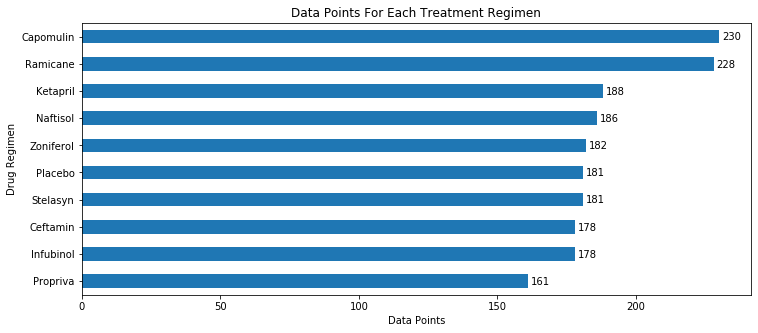

In [131]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Get the number of data points for each drug regimen
data_points = drug_regimen_tumor_volumes['Mouse ID'].count()
drug_regimen_data_points = pd.DataFrame({'Data Points': data_points})
drug_regimen_data_points = drug_regimen_data_points.sort_values('Data Points', ascending=False)

# Generate a bar plot using DataFrame.plot()
data_points_axes = drug_regimen_data_points.plot.barh(figsize=(12,5), legend=False)
data_points_axes.set_title('Data Points For Each Treatment Regimen')
data_points_axes.set_xlabel('Data Points')
data_points_axes.set_ylabel('Drug Regimen')
index = 0
for i in data_points_axes.patches:
    # get_x pulls left or right; get_height pushes up or down
    data_points_axes.text(i.get_width()+1, i.get_y()+.38, str(drug_regimen_data_points['Data Points'][index]))
    index += 1
data_points_axes.invert_yaxis()

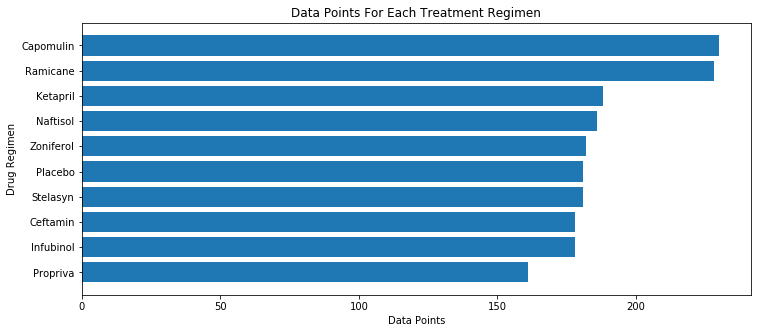

In [132]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(drug_regimen_data_points))
drug_regimens = drug_regimen_data_points.index.tolist()
plt.figure(figsize=(12,5))
plt.barh(x_axis, drug_regimen_data_points['Data Points'])
plt.yticks(x_axis, drug_regimens)
plt.title('Data Points For Each Treatment Regimen')
plt.xlabel('Data Points')
plt.ylabel('Drug Regimen')
plt.gca().invert_yaxis()
plt.show()

## Pie plots

(-1.14272521194069, 1.126723612002736, -1.1509808823817114, 1.124033996981642)

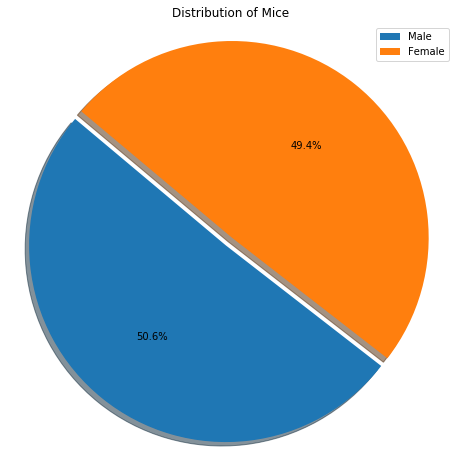

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_type = mice_study_data['Sex'].unique()
mice_sex = mice_study_data['Sex'].value_counts()

mice_sex_df = pd.DataFrame({'Distribution of Mice': mice_sex})
explode = (0.05, 0)

mice_axes = mice_sex_df.plot.pie(y=0, explode=explode, labels=['',''], autopct="%1.1f%%", shadow=True, startangle=140, figsize=(8, 8))
mice_axes.set_title('Distribution of Mice')
mice_axes.set_ylabel('')
mice_axes.legend(mice_sex_type)
mice_axes.axis('equal')

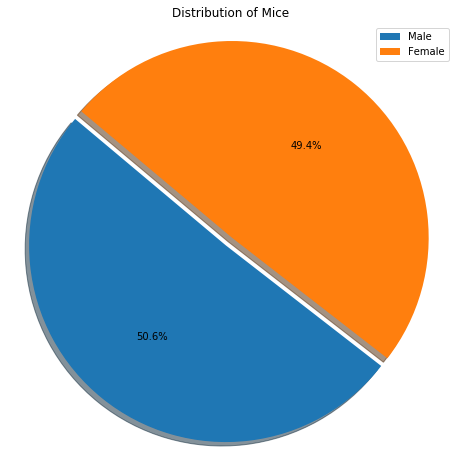

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8,8))
plt.pie(mice_sex, explode=explode, labels=['',''], autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Distribution of Mice')
plt.legend(mice_sex_type)
plt.show()

## Quartiles, outliers and boxplots

In [161]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# mice_data_promising_drugs = mice_study_data[mice_study_data['Drug Regimen'].isin(promising_drug_regimens)] 
# final_tumor_volume_data = mice_data_promising_drugs.sort_values('Timepoint').groupby(['Mouse ID', 'Drug Regimen']).last()
# final_tumor_volume_data = final_tumor_volume_data.sort_values('Tumor Volume (mm3)')

def analyze_tumor_volume_outliers(final_tumor_volume_data, promising_drug_regimen):

    tumor_volume_quartiles = 0
    tumor_volume_lowerq = 0
    tumor_volume_median = 0
    tumor_volume_upperq = 0
    tumor_volume_iqr = 0
    lower_bound = 0
    upper_bound = 0
    
    # Calculate the quartiles and IQR for the final tumor volumes
    tumor_volume_quartiles = final_tumor_volume_data['Tumor Volume (mm3)'].quantile([0.25,0.50,0.75])
    tumor_volume_lowerq = tumor_volume_quartiles[0.25]
    tumor_volume_median = tumor_volume_quartiles[0.50]
    tumor_volume_upperq = tumor_volume_quartiles[0.75]
    tumor_volume_iqr = tumor_volume_upperq - tumor_volume_lowerq
    # Determine bounds for outliers
    lower_bound = tumor_volume_lowerq - (1.5 * tumor_volume_iqr)
    upper_bound = tumor_volume_upperq + (1.5 * tumor_volume_iqr)

    # Print quantitative analysis and outliers based on the quartiles and IQR
    print("\n" + f"-" * 60)
    print(f"QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR \'{promising_drug_regimen}\'")
    print(f"-" * 60)
    print(f"Lower Quartile (Q1): {tumor_volume_lowerq}")
    print(f"Median: {tumor_volume_median} ")
    print(f"Upper Quartile (Q3): {tumor_volume_upperq}")
    print(f"IQR: {tumor_volume_iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be Outliers")

    tumor_volume_outliers = final_tumor_volume_data.loc[(final_tumor_volume_data['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_data['Tumor Volume (mm3)'] > upper_bound)]
    if tumor_volume_outliers.empty:
        print(f"No actual Outliers were found for the {promising_drug_regimen} treatment")
    else:
        print(f"\nChecked for Outliers and found the following mice that were treated with {promising_drug_regimen}...")
        print(tabulate(tumor_volume_outliers.to_records(), headers = 'keys', tablefmt = 'fancy_grid'))

promising_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes_box_plots = []

for promising_drug_regimen in promising_drug_regimens:
    mice_data_promising_drugs = mice_study_data[mice_study_data['Drug Regimen'] == promising_drug_regimen]
    final_tumor_volume_data = mice_data_promising_drugs.sort_values('Timepoint').groupby(['Mouse ID', 'Drug Regimen']).last()
    final_tumor_volume_data = final_tumor_volume_data.sort_values('Tumor Volume (mm3)')
    tumor_volumes_box_plots.append(final_tumor_volume_data['Tumor Volume (mm3)'].to_numpy())
    analyze_tumor_volume_outliers(final_tumor_volume_data, promising_drug_regimen)



------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Capomulin'
------------------------------------------------------------
Lower Quartile (Q1): 32.37735684
Median: 38.125164399999996 
Upper Quartile (Q3): 40.1592203
IQR: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be Outliers
No actual Outliers were found for the Capomulin treatment

------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Ramicane'
------------------------------------------------------------
Lower Quartile (Q1): 31.56046955
Median: 36.56165229 
Upper Quartile (Q3): 40.65900627
IQR: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be Outliers
No actual Outliers were found for the Ramicane treatment

------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Infubinol'
--------------------------

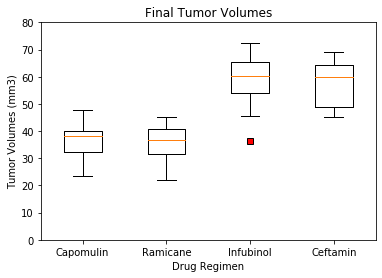

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot_fig, box_plot_ax = plt.subplots()
box_plot_ax.set_title('Final Tumor Volumes')
box_plot_ax.set_ylabel('Tumor Volumes (mm3)')
box_plot_ax.set_xlabel('Drug Regimen')
red_square = dict(markerfacecolor='r', marker='s')
box_plot_ax.boxplot(tumor_volumes_box_plots, labels=promising_drug_regimens, flierprops=red_square)
box_plot_ax.set_ylim(0,80)
plt.show()


## Line and scatter plots

In [137]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [138]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [139]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen